# Import Libraries

In [666]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore')

In [667]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

In [668]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

# Explore Data 

### Displaying the First Few Rows of the Laptop Dataset for Initial Inspection

In [670]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Getting the Dimensions of the Dataset (Rows, Columns)

In [671]:
df.shape

(1303, 12)

### Retrieving the Column Names of the Dataset

In [672]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

### Displaying Summary Information About the Dataset, Including Data Types and Non-Null Counts

In [673]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Counting the Number of Duplicate Rows in the Dataset

In [674]:
df.duplicated().sum()

0

### Counting the Number of Missing (Null) Values in Each Column of the Dataset

In [675]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# 

### Dropping the 'Unnamed: 0' Column from the Dataset and Displaying the First Few Rows After the Removal

In [676]:
df.drop(columns=["Unnamed: 0"],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Cleaning the 'Ram' and 'Weight' Columns by Removing 'GB' and 'kg' Units

In [677]:
df["Ram"]=df["Ram"].str.replace("GB"," ")
df["Weight"]=df["Weight"].str.replace("kg"," ")

In [678]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### Converting the 'Ram' Column to Integer Type and the 'Weight' Column to Float Type

In [679]:
df["Ram"]=df["Ram"].astype("int32")
df["Weight"]=df["Weight"].astype("float32")

# EDA For Weight Column

### Box Plot for Weight: Detecting Outliers and Variability

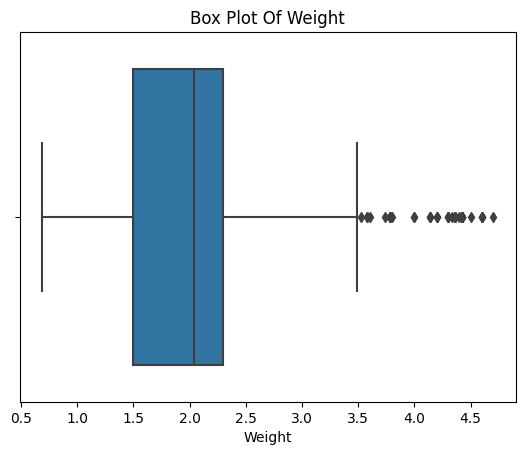

In [680]:
sns.boxplot(x=df["Weight"],data=df)
plt.title("Box Plot Of Weight")
plt.show()

In [681]:
df['Weight'] = np.log1p(df['Weight'])

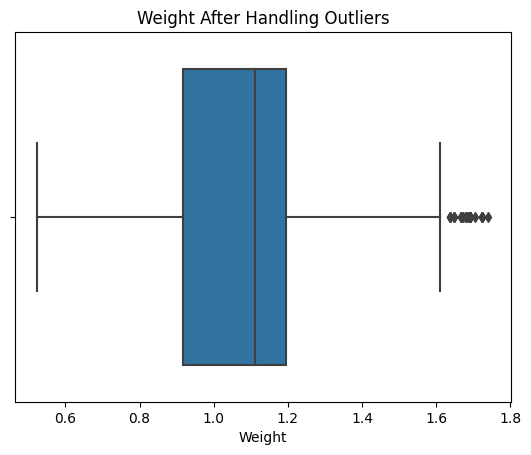

In [682]:
sns.boxplot(x=df["Weight"],data=df)
plt.title("Weight After Handling Outliers")
plt.show()

In [683]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# EDA For Company Column

### Analyzing the Distribution of Laptop Brands: Count of Each Company and Countplot Visualization

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
****************************************************


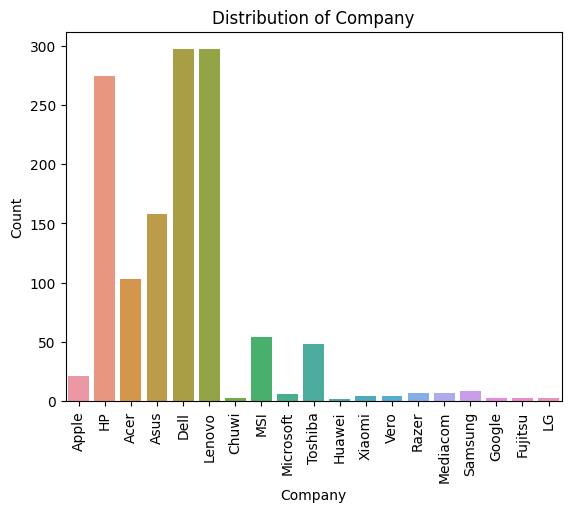

In [684]:
Company_Count=df["Company"].value_counts()
print(Company_Count)
print("****************************************************")
sns.countplot(data=df,x=df["Company"])
plt.xticks(rotation=90)
plt.title("Distribution of Company")
plt.xlabel("Company")
plt.ylabel("Count")
plt.show()

* The output allows for identifying which companies appear most frequently in the dataset.
* It helps to spot trends, such as dominant companies or outliers with very few occurrences.
* The visualization provides a clearer understanding of the data distribution compared to raw counts alone.



### Visualizing the Average Price of Laptops for Each Company: Barplot of Price vs Company

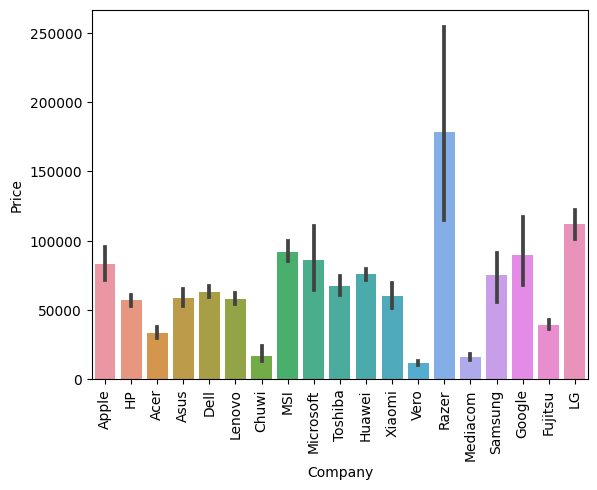

In [685]:
sns.barplot(data=df,x=df["Company"],y=df["Price"])
plt.xticks(rotation=90)
plt.show()

### Calculating and Displaying the Company with the Highest Average Laptop Price

In [686]:
average_price_by_company = df.groupby('Company')['Price'].mean().sort_values(ascending=False)

# Display the type with the highest average price
top_company = average_price_by_company.idxmax()
top_average_price = average_price_by_company.max()
print(f"{top_company} : {top_average_price}" )


Razer : 178282.49142857143


* Razer Company has the highest average price of 178282.49142857143

# EDA For TypeName Column

### Analyzing the Distribution of Laptop Types: Count of Each Type and Countplot Visualization

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
********************************************************************


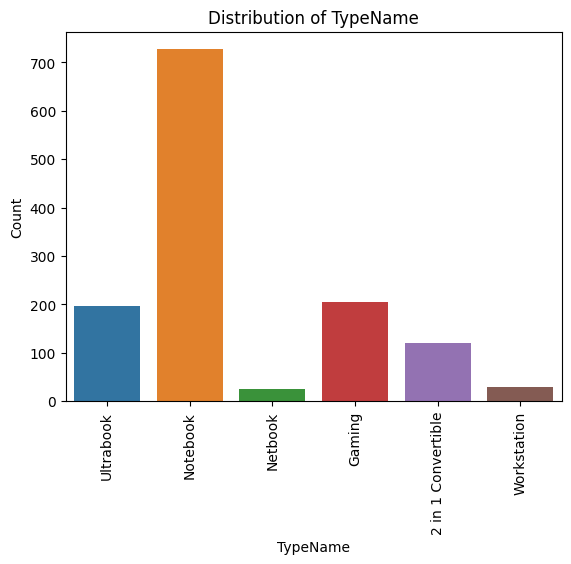

In [687]:
TypeName_Count=df["TypeName"].value_counts()
print(TypeName_Count)
print("********************************************************************")
sns.countplot(data=df,x=df["TypeName"])
plt.xticks(rotation=90)
plt.title("Distribution of TypeName")
plt.xlabel("TypeName")
plt.ylabel("Count")
plt.show()

### Visualizing Laptop Prices by Type: Boxplot and Barplot of Price Distribution and Average Price by TypeName

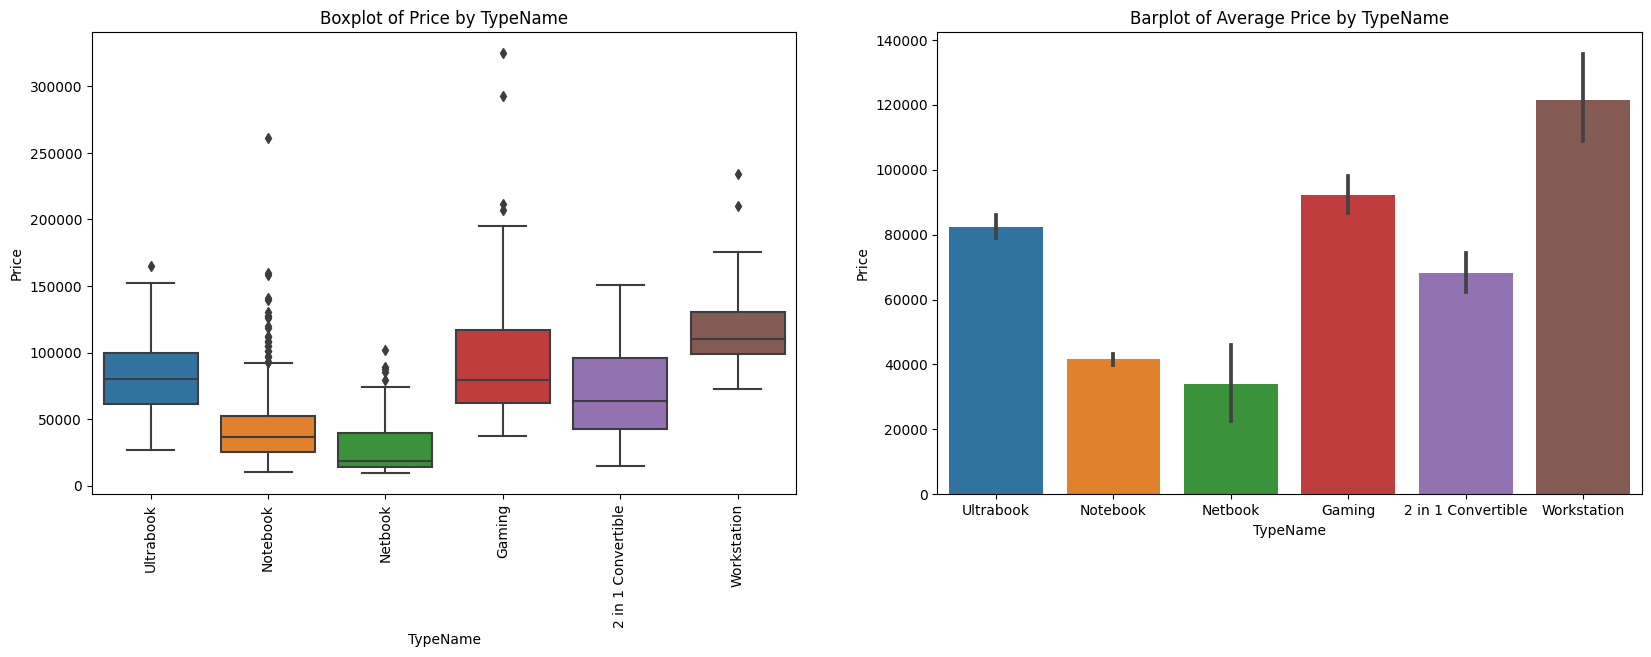

In [688]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.boxplot(data=df,x=df["TypeName"],y=df["Price"])
plt.title("Boxplot of Price by TypeName")  
plt.xlabel("TypeName") 
plt.ylabel("Price")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(data=df,x=df["TypeName"],y=df["Price"])
plt.title("Barplot of Average Price by TypeName")  
plt.xlabel("TypeName") 
plt.ylabel("Price")
plt.show()

### Calculating and Displaying the Laptop Type with the Highest Average Price

In [689]:
average_price_by_type = df.groupby('TypeName')['Price'].mean().sort_values(ascending=False)

# Display the type with the highest average price
top_type = average_price_by_type.idxmax()
top_average_price = average_price_by_type.max()
print(f"{top_type} : {top_average_price}" )


Workstation : 121497.52568275863


* The Workstation type has the highest average price of 121497.53.

### Finding the Laptop Type with the Highest Price in the Dataset

In [690]:
df[["TypeName","Price"]][df["Price"]==df["Price"].max()]

,TypeName,Price
196,Gaming,324954.72


# EDA For Inches Column

* The most expensive laptop in the dataset belongs to the Gaming category, priced at 324,954.72.

### Analyzing the Distribution of Laptop Screen Sizes: Count and Distribution of Laptops by Screen Size (Inches)

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64
*************************************************************************


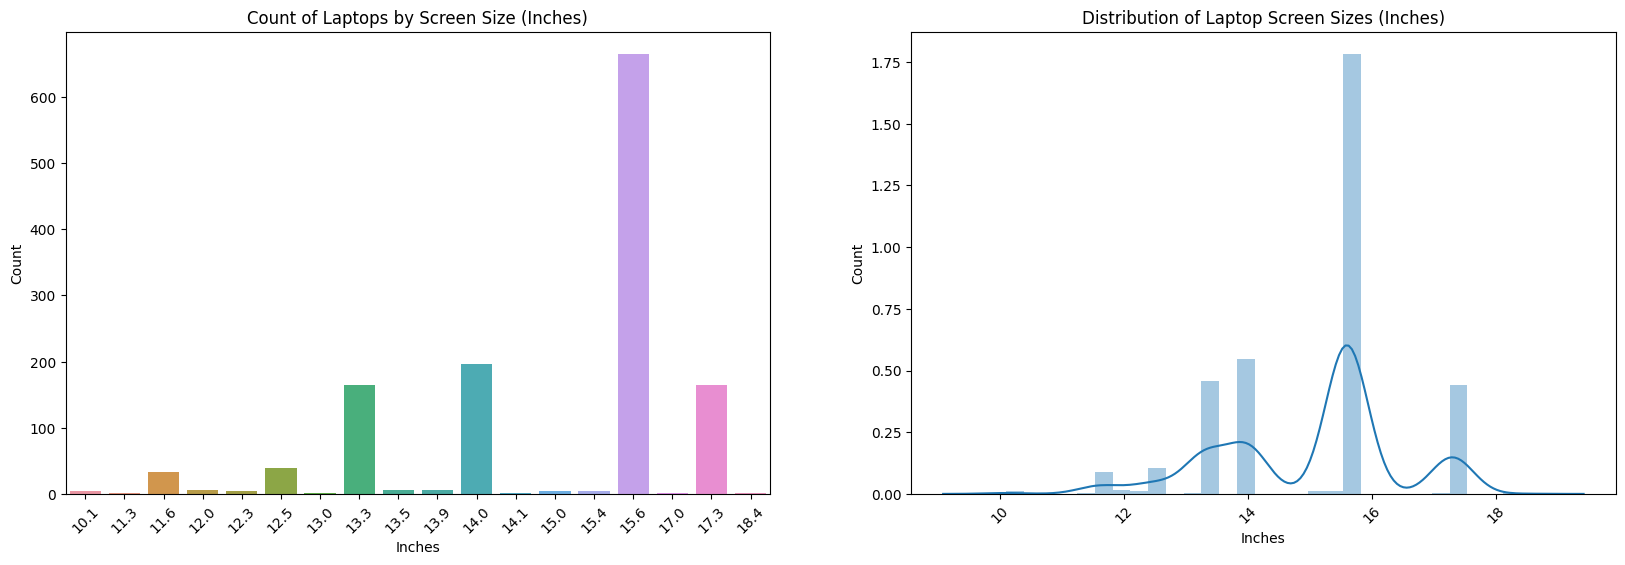

In [691]:
print(df["Inches"].value_counts())
print("*************************************************************************")

plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.countplot(data=df,x=df["Inches"])
plt.title("Count of Laptops by Screen Size (Inches)")  
plt.xlabel("Inches") 
plt.ylabel("Count") 
plt.xticks(rotation=45) 

plt.subplot(1,2,2)
sns.distplot(x=df["Inches"])
plt.title("Distribution of Laptop Screen Sizes (Inches)")  
plt.xlabel("Inches") 
plt.ylabel("Count") 
plt.xticks(rotation=45) 

plt.show()

* The market shows a strong preference for mid-sized screens (15.6 inches), with smaller sizes being less favored.
* There could be opportunities to target specific user segments with compact devices.
* Larger screens remain a niche choice, likely catering to specialized needs such as gaming or professional workstations.

### Exploring the Relationship Between Screen Size and Price: Scatterplot and Barplot of Price vs Screen Size (Inches)

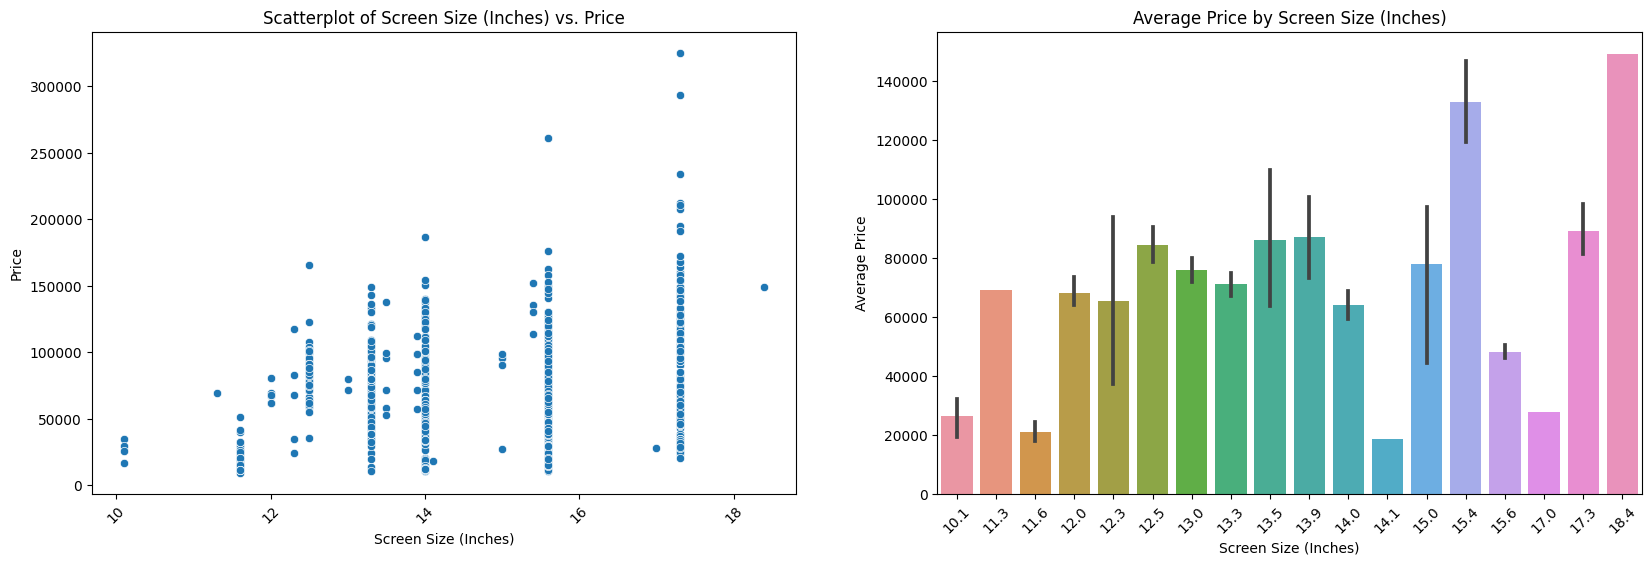

In [692]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.scatterplot(data=df,x=df["Inches"],y=df["Price"])
plt.title("Scatterplot of Screen Size (Inches) vs. Price")  
plt.xlabel("Screen Size (Inches)") 
plt.ylabel("Price") 
plt.xticks(rotation=45) 

plt.subplot(1,2,2)
sns.barplot(data=df,x=df["Inches"],y=df["Price"])
plt.title("Average Price by Screen Size (Inches)")  
plt.xlabel("Screen Size (Inches)") 
plt.ylabel("Average Price") 
plt.xticks(rotation=45) 

plt.show()

* Price is not solely determined by screen size, as factors like brand, features, and specifications play a major role.
* Larger screens are generally more expensive, but there are still affordable options available.
Users looking for budget-friendly options are more likely to find them in smaller screen sizes.
* Businesses can leverage this data to target mid-sized laptops (15.6 inches) with balanced pricing strategies.

# EDA For ScreenResolution Column

### Analyzing Laptop Screen Resolutions: Countplot and Boxplot of Screen Resolution Distribution

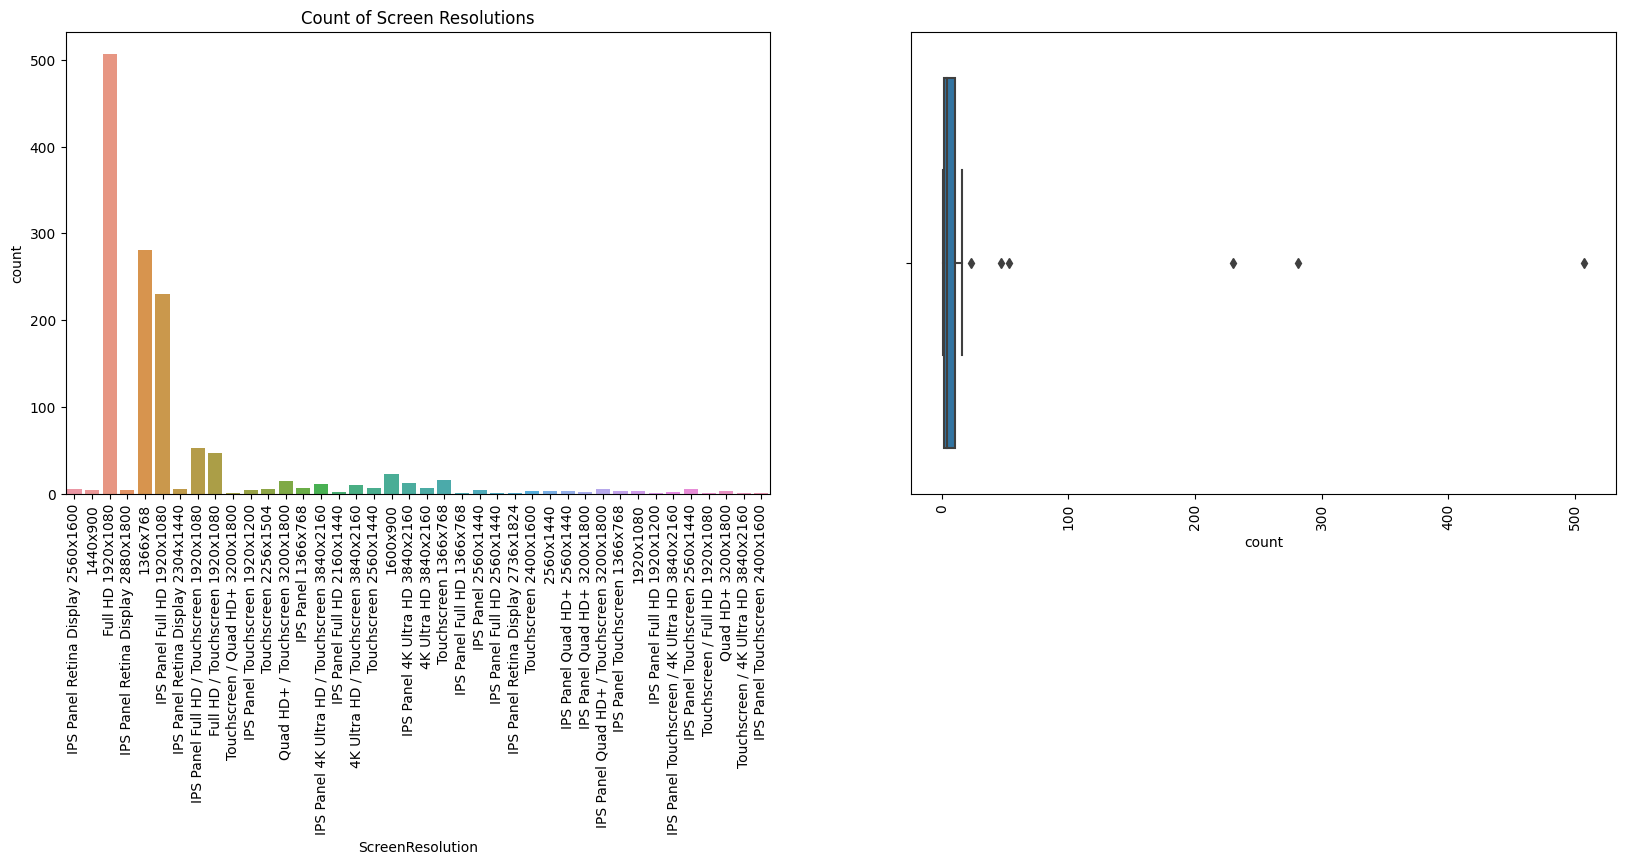

In [693]:


plt.figure(figsize=(20, 6))


plt.subplot(1,2,1)
sns.countplot(x=df["ScreenResolution"])
plt.title("Count of Screen Resolutions")
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.boxplot(x=df["ScreenResolution"].value_counts())
plt.xticks(rotation=90)



plt.show()

* Market Preference: The market favors a limited number of popular resolutions, mainly targeting mainstream users with standard display options.
* Opportunities for Niche Markets: Higher-end resolutions have lower adoption, which could indicate a potential niche for professional or gaming users.
* Budget vs. Premium: Lower resolutions are prevalent, likely due to cost-effectiveness, whereas high resolutions remain exclusive to premium devices.

# EDA For Touchscreen Column

### Creating a New Column 'Touchscreen' Based on the Presence of 'Touchscreen' in Screen Resolution

In [694]:
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [695]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
443,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4,128GB SSD,Intel HD Graphics 505,Windows 10,1.163151,18594.72,0
1159,HP,2 in 1 Convertible,13.3,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,8,512GB SSD,Intel HD Graphics 520,Windows 10,0.908259,108744.48,1
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,1.163151,19660.32,0


### Analyzing the Distribution of Touchscreen Laptops: Count of Touchscreen vs Non-Touchscreen Devices

Touchscreen
0    1111
1     192
Name: count, dtype: int64
*****************************************************************************


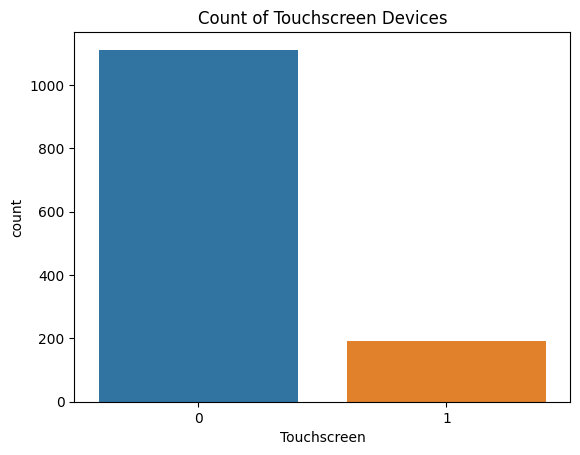

In [696]:
print(df["Touchscreen"].value_counts())
print("*****************************************************************************")
sns.countplot(data=df,x=df["Touchscreen"])
plt.title("Count of Touchscreen Devices")
plt.show()


### Visualizing the Average Price of Laptops Based on Touchscreen Feature: Barplot of Price vs Touchscreen

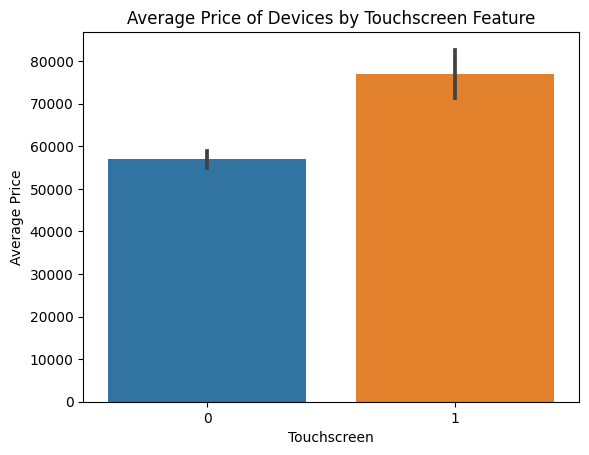

In [697]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.title("Average Price of Devices by Touchscreen Feature") 
plt.xlabel("Touchscreen")  
plt.ylabel("Average Price") 
plt.show()

* Touchscreen vs Non-Touchscreen: Laptops with touchscreen functionality are likely more expensive than those without.

* Premium Feature: Touchscreens are a premium feature, often found in high-end or convertible laptops.

* Target Audience: Touchscreen laptops are typically targeted at users who prioritize convenience, such as professionals or creatives.

* Budget Laptops: Non-touchscreen laptops are cheaper and more common in budget or standard models.

# EDA For Ips Column

### Creating a New Column 'Ips' Based on the Presence of 'IPS' in Screen Resolution

In [698]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [699]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
219,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,0.963174,68145.1200,1,0
115,HP,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,0.815365,74538.1872,1,1
470,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,0.828552,106506.7200,1,1
1025,HP,Ultrabook,12.5,1366x768,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,0.815365,83063.5200,0,0
689,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4,500GB HDD,Intel HD Graphics 510,Windows 10,1.131402,16943.0400,0,0


### Analyzing the Distribution of Laptops with IPS Screens: Count of IPS vs Non-IPS Devices

Ips
0    938
1    365
Name: count, dtype: int64
*************************************************************************


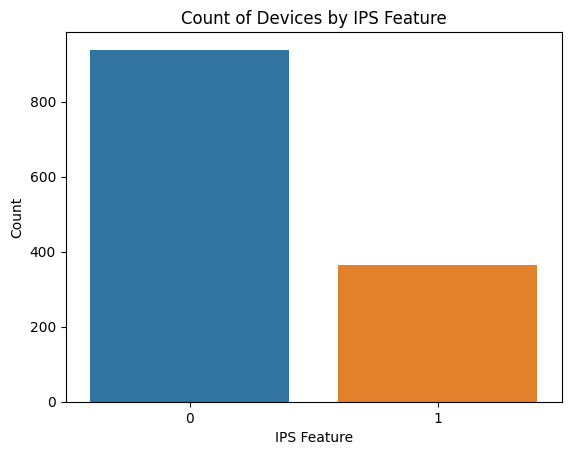

In [700]:
print(df["Ips"].value_counts())
print("*************************************************************************")
sns.countplot(data=df,x=df["Ips"])
plt.title("Count of Devices by IPS Feature") 
plt.xlabel("IPS Feature")  
plt.ylabel("Count")
plt.show()

### Visualizing the Average Price of Laptops Based on IPS Feature: Barplot of Price vs IPS

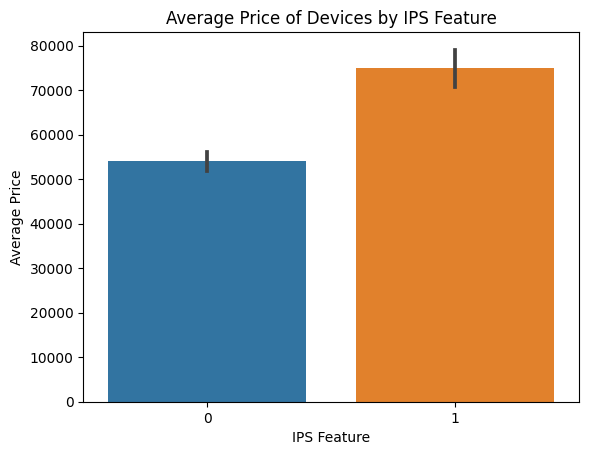

In [701]:
sns.barplot(data=df,x=df["Ips"],y=df["Price"])
plt.title("Average Price of Devices by IPS Feature")  
plt.xlabel("IPS Feature")  
plt.ylabel("Average Price") 
plt.show()

* IPS vs Non-IPS: Laptops with IPS displays are likely more expensive than those without IPS.

* Premium Feature: IPS is a premium feature, often found in higher-end laptops, which justifies the higher price.

* Visual Quality: IPS displays offer better color accuracy and viewing angles, making them desirable for professionals and gamers.

* Budget Laptops: Non-IPS laptops are cheaper and typically found in budget or entry-level models



### Splitting the 'ScreenResolution' Column into Two Separate Columns: Width and Height

In [702]:
new=df["ScreenResolution"].str.split("x",n=1,expand=True)

### Creating Separate Columns 'X_res' and 'Y_res' for Screen Resolution Width and Height

In [703]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [704]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,0.862890,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,0.850151,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.050822,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.040277,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,0.862890,96095.8080,0,1,IPS Panel Retina Display 2560,1600


### Cleaning the 'X_res' Column: Removing Commas and Extracting the First Numeric Value for Screen Width

In [705]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

### Converting 'X_res' and 'Y_res' Columns to Integer Data Type for Screen Resolution Width and Height

In [706]:
df["X_res"]=df["X_res"].astype("int32")
df["Y_res"]=df["Y_res"].astype("int32")

In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


### Calculating the Correlation of Numerical Features with the 'Price' Column

In [708]:
numeric_df = df.select_dtypes(include=['float64', 'int64',"int32"])
correlation_with_price = numeric_df.corr()['Price']
print(correlation_with_price)

Inches         0.068197
Ram            0.743007
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64


### Calculating the Pixels Per Inch (PPI) for Each Laptop Based on Screen Resolution and Screen Size

In [709]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

### Calculating and Displaying the Correlation Between Numerical Features and Laptop Prices

In [710]:
numeric_df = df.select_dtypes(include=['float64', 'int64',"int32"])
correlation_with_price = numeric_df.corr()['Price']
print(correlation_with_price)

Inches         0.068197
Ram            0.743007
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64


* Strong Positive Correlation: Features like RAM, SSD Storage, or Screen Resolution likely have a high positive correlation with price, meaning higher values in these features increase the laptop's price.

* Weak or No Correlation: Features like Weight or HDD Storage may have little to no correlation with price, indicating they don't significantly impact pricing.

* Negative Correlation: Some features (e.g., Age of the model) might have a negative correlation, meaning older models tend to be cheaper.

* Key Drivers of Price: RAM and Storage Type (e.g., SSD) are likely the most influential factors in determining laptop prices.

* Insignificant Features: Features like Inches (screen size) might have a low correlation, suggesting screen size alone doesn't heavily influence price.



In [711]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,0.862890,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,0.850151,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.050822,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.040277,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,0.862890,96095.8080,0,1,2560,1600,226.983005


### Dropping the 'ScreenResolution' Column from the Dataset as It Is No Longer Needed

In [712]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [713]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
311,Dell,Ultrabook,13.3,Intel Core i7 8550U 1.8GHz,16,1TB SSD,Intel UHD Graphics 620,Windows 10,0.792993,133146.72,1,1,3840,2160,331.264236
331,Toshiba,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.098612,50243.04,0,1,1920,1080,141.211998
986,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,1.111858,42943.68,0,0,1920,1080,141.211998
1072,HP,Ultrabook,12.5,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,0.815365,63882.72,0,0,1920,1080,176.232574
1170,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.085189,36177.12,0,0,1920,1080,141.211998


### Dropping the 'X_res', 'Y_res', and 'Inches' Columns from the Dataset

In [714]:
df.drop(columns=["X_res","Y_res","Inches"],inplace=True)

In [715]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,0.862890,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,0.850151,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.050822,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.040277,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,0.862890,96095.8080,0,1,226.983005


### Displaying the Count of Each Unique CPU Model in the Dataset

In [716]:
print(df["Cpu"].value_counts())

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64


### Creating a New Column 'Cpu Name' Containing the First Three Words of the CPU Model

In [717]:
df["Cpu Name"]=df["Cpu"].apply(lambda x : " ".join(x.split()[0:3]))

In [718]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,0.862890,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,0.850151,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.050822,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.040277,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,0.862890,96095.8080,0,1,226.983005,Intel Core i5


# EDA For Cpu Name Column

### Displaying the Count of Each Unique CPU Name in the Dataset

In [719]:
df["Cpu Name"].value_counts()

Cpu Name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1

### Visualizing the Distribution of CPU Names: Countplot of CPU Name Frequencies

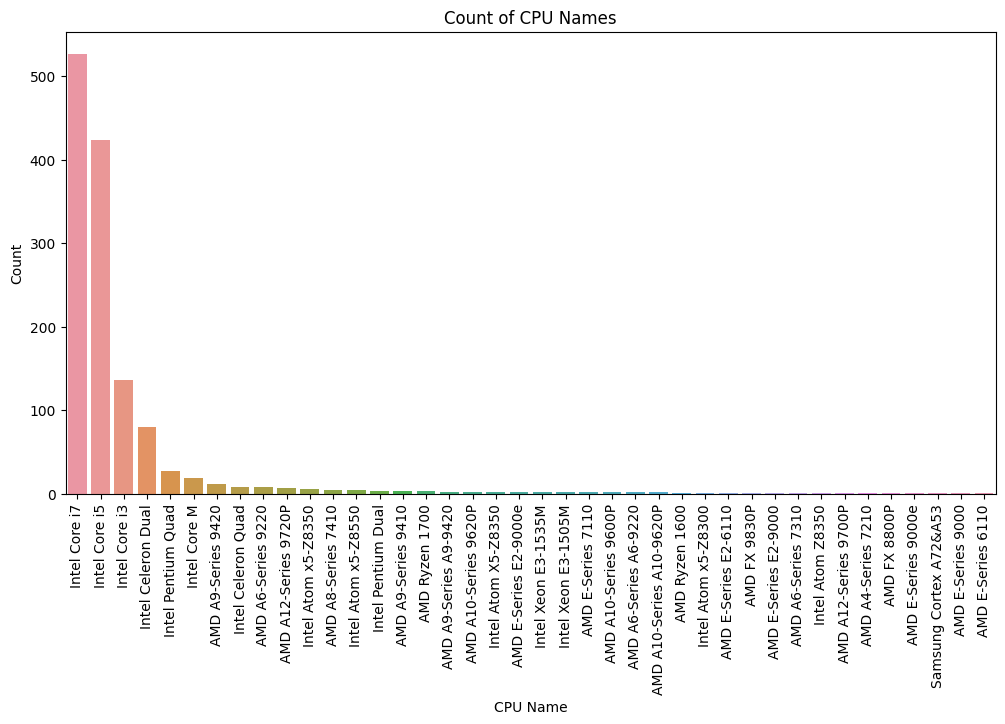

In [720]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Cpu Name", order=df["Cpu Name"].value_counts().index)
plt.xticks(rotation=90) 
plt.title("Count of CPU Names")  
plt.xlabel("CPU Name") 
plt.ylabel("Count")  
plt.show()

### Visualizing the Average Laptop Price by CPU Name: Barplot of CPU Name vs Price

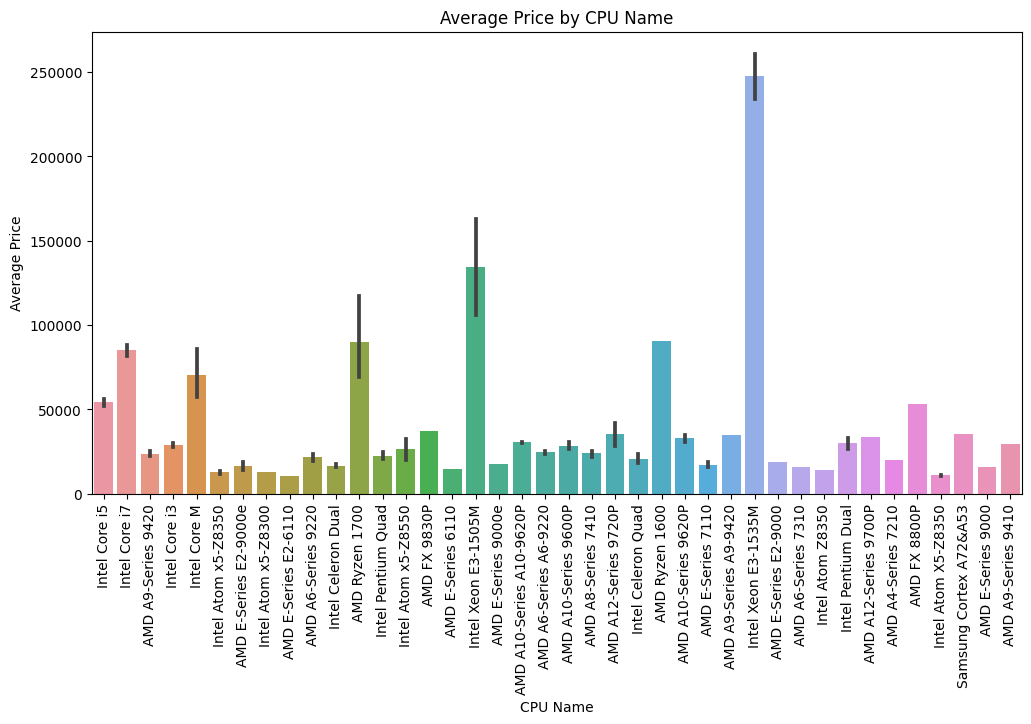

In [721]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x="Cpu Name",y=df["Price"])
plt.xticks(rotation=90) 
plt.title("Average Price by CPU Name") 
plt.xlabel("CPU Name")  
plt.ylabel("Average Price")
plt.show()

* Price Variation Across CPUs:
    * The plot shows how the average price varies for different CPU models, helping identify which     CPUs are associated with higher or lower prices.

* Premium CPUs:
    * CPU models with higher average prices likely represent premium or high-performance products.

* Budget-Friendly CPUs:
    * CPU models with lower average prices may indicate budget-friendly or entry-level options.

* Brand Influence on Pricing:
    * The plot helps in understanding if certain CPU brands or models have a significant impact on the price of devices.

### Defining a Function to Categorize CPU Types: Classifying Intel Core Processors and Other Intel/AMD Processors

In [722]:
def fetch_processor (text):
    if text== 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0]=="Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

# EDA For Cpu Brand Column

### Creating a New Column 'Cpu Brand' by Categorizing CPUs into Intel Core, Other Intel, or AMD Processors

In [723]:
df["Cpu Brand"]=df["Cpu Name"].apply(fetch_processor)

In [724]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,0.862890,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,0.850151,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.050822,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.040277,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,0.862890,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


### Analyzing the Distribution of CPU Brands: Count of Each CPU Brand and Visualization Using Countplot

Cpu Brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64
*************************************************************


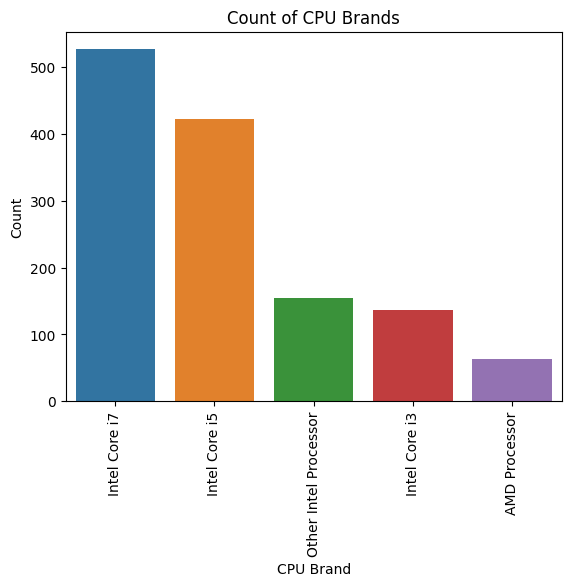

In [725]:
print(df["Cpu Brand"].value_counts())
print("*************************************************************")
sns.countplot(x=df["Cpu Brand"],order=df["Cpu Brand"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Count of CPU Brands")  
plt.xlabel("CPU Brand") 
plt.ylabel("Count") 
plt.show()

### Visualization of Average Prices for Different CPU Brands

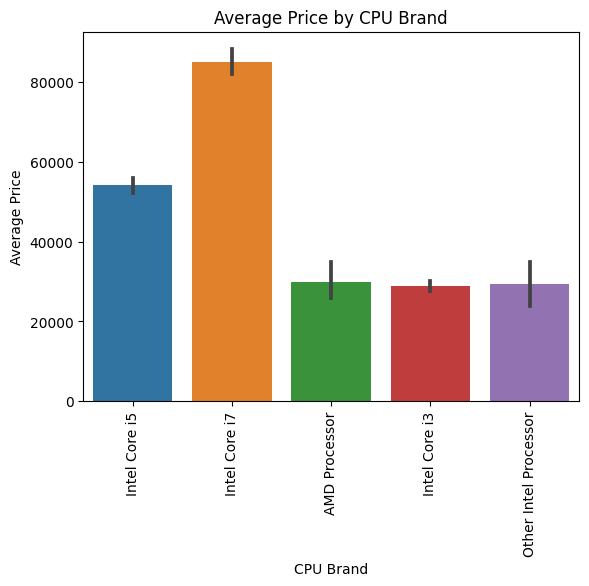

In [726]:
sns.barplot(data=df,x=df["Cpu Brand"],y=df["Price"])
plt.title("Average Price by CPU Brand") 
plt.xlabel("CPU Brand") 
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

* Intel Core i7/i9 and AMD Ryzen 7/9 are the most expensive, targeting high-performance laptops.

* Intel Core i5 and AMD Ryzen 5 are mid-range, balancing performance and price.

* Intel Pentium, Celeron, and AMD A-Series are the cheapest, used in budget laptops.

* AMD Ryzen offers better value for money compared to Intel at similar performance levels.

* Higher-end CPUs (e.g., i9, Ryzen 9) are for premium laptops, while entry-level CPUs (e.g., Celeron, A-Series) are for basic tasks.

* The price increases significantly with higher-performance CPU brands.

### Dropping the 'Cpu' Column from the DataFrame

In [727]:
df.drop(columns="Cpu",inplace=True)

In [728]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,0.862890,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,0.850151,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.050822,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.040277,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,0.862890,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


# EDA For RAM Column

### Analyzing RAM Sizes: Distribution and Boxplot Visualization

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64
************************************************************************


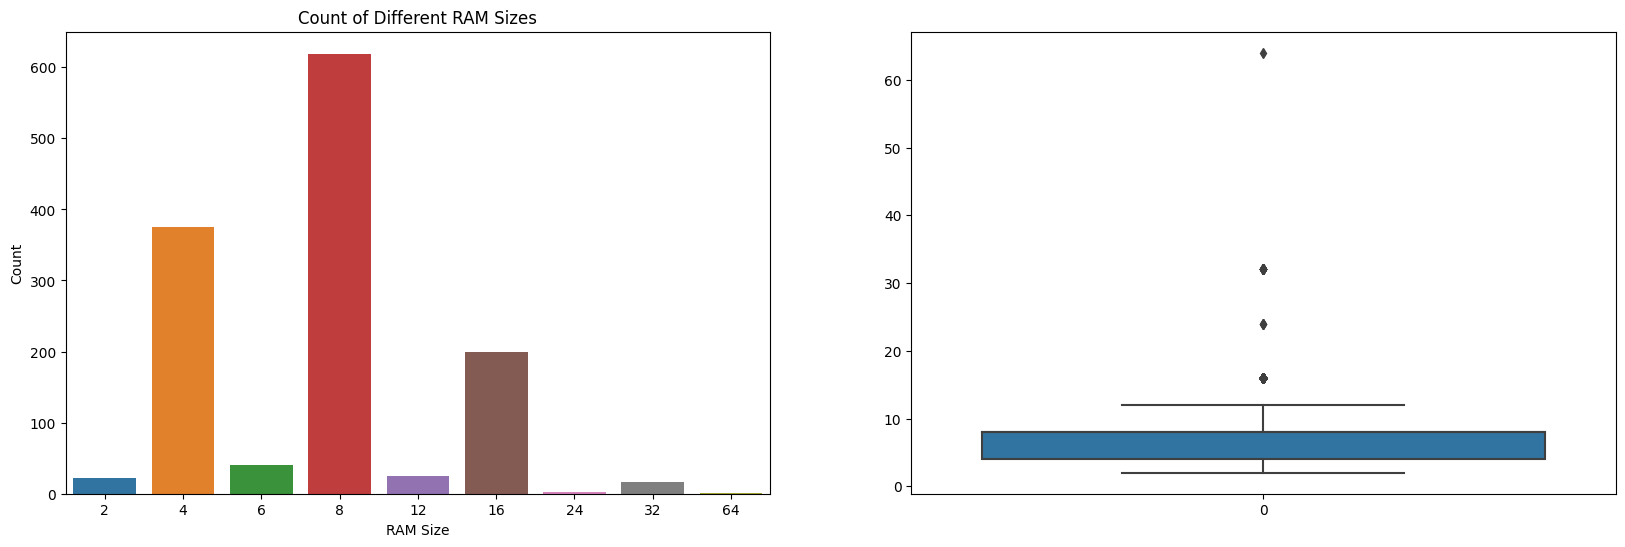

In [729]:
print(df["Ram"].value_counts())
print("************************************************************************")
plt.figure(figsize=(20, 6))


plt.subplot(1,2,1)
sns.countplot(x=df["Ram"])
plt.title("Count of Different RAM Sizes")
plt.xlabel("RAM Size")  
plt.ylabel("Count") 

plt.subplot(1,2,2)
sns.boxplot(df["Ram"])
plt.show()

 1) Most Popular RAM Size

    Insight: The most common RAM size is 8GB, meaning most laptops in the dataset are designed for everyday tasks like browsing, office work, and light gaming.

 2) Budget vs. Premium Options

    * Insight:

      * 4GB laptops are likely budget-friendly options for basic tasks.

      * 16GB and higher RAM sizes are premium options for power users, such as gamers or professionals.

 3) Niche Market for High RAM

    * Insight: Laptops with 32GB or 64GB RAM are rare and cater to specialized needs like video editing, 3D rendering, or data science.

 4) Consumer Preference

    * Insight: Most consumers prefer 8GB RAM because it offers a good balance of performance and affordability.

 5) Market Trends

    * Insight: The dominance of 8GB RAM suggests that mid-range laptops are the most popular, while higher RAM sizes are less common but still important for specific use cases.

 6) Outliers Indicate High-End Laptops

    * Insight: Outliers in the box plot (e.g., 32GB or 64GB) represent high-performance laptops, likely targeting professionals or enthusiasts.

 7) Simple Recommendation

    * For Consumers:

        Choose 8GB for everyday use.

        Go for 16GB or higher if you need more power for gaming or professional work.

### Bar Plot: Average Price by RAM Size

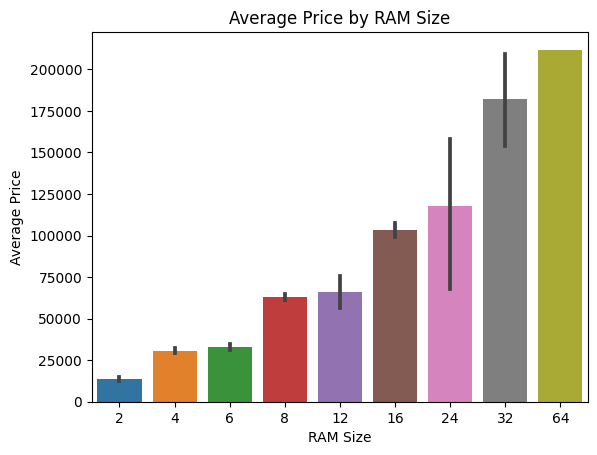

In [730]:
sns.barplot(data=df,x=df["Ram"],y=df["Price"])
plt.title("Average Price by RAM Size")  
plt.xlabel("RAM Size") 
plt.ylabel("Average Price")
plt.show()

* Positive Correlation:

    * The average price generally increases with larger RAM sizes. This reflects the fact that higher RAM sizes are typically found in premium laptops designed for performance-intensive tasks, such as gaming, video editing, or data processing.

* Price Jump for Higher RAM:

    * There may be a significant price jump as you move to 16GB or 32GB RAM, as these configurations are often paired with other high-end components.

* Entry-Level RAM Sizes:

    * Lower RAM sizes, like 4GB and 8GB, are associated with budget laptops, leading to lower average prices.

In [731]:
ram_lower_bound = np.percentile(df['Ram'], 5)
ram_upper_bound = np.percentile(df['Ram'], 95)
df['Ram'] = np.where(df['Ram'] > ram_upper_bound, ram_upper_bound, df['Ram'])
df['Ram'] = np.where(df['Ram'] < ram_lower_bound, ram_lower_bound, df['Ram'])

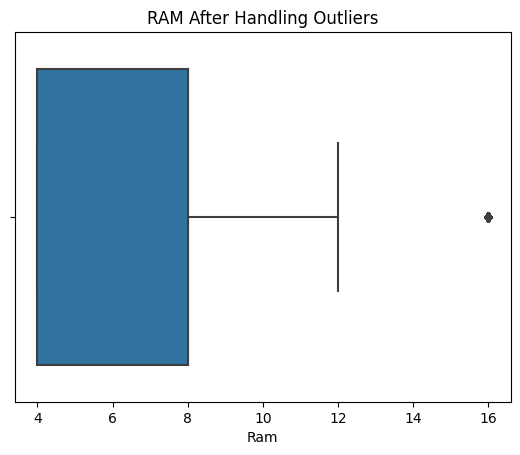

In [732]:
sns.boxplot(x=df["Ram"],data=df)
plt.title("RAM After Handling Outliers")
plt.show()

# EDA For Memory Column

### Displaying the Count of Unique Memory Configurations in the DataFrame

In [733]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

### Memory Column Transformation: Parsing and Categorizing Storage Types

In [734]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].str.extract(r'(\d+)') 
df["first"] = df["first"].astype(float).astype(int)
df["second"] = df["second"].str.extract(r'(\d+)')  
df["second"] = df["second"].astype(float).astype(int)  

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [735]:
df.sample(4)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
326,Acer,Notebook,6.0,1000 HDD,Intel HD Graphics 620,Windows 10,1.172482,29250.7200,0,0,100.454670,Intel Core i5,Intel Core i5,1000,0,0,0
617,HP,Ultrabook,8.0,512 SSD,Intel HD Graphics 620,Windows 10,1.043804,74005.9200,0,0,141.211998,Intel Core i7,Intel Core i7,0,512,0,0
48,Dell,Notebook,4.0,256 SSD,AMD Radeon R5 M430,Windows 10,1.193923,34045.9200,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,0.850151,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128


### Dropping the 'Memory' Column from the DataFrame

In [736]:
df.drop(columns="Memory",inplace=True)

In [737]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8.0,Intel Iris Plus Graphics 640,macOS,0.862890,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8.0,Intel HD Graphics 6000,macOS,0.850151,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,Notebook,8.0,Intel HD Graphics 620,No OS,1.050822,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16.0,AMD Radeon Pro 455,macOS,1.040277,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8.0,Intel Iris Plus Graphics 650,macOS,0.862890,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0


### Calculating Correlation of Numeric Features with 'Price'

In [738]:
numeric_df = df.select_dtypes(include=['float64', 'int64',"int32"])
correlation_with_price = numeric_df.corr()['Price']
print(correlation_with_price)

Ram              0.714803
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64


### Counting the Frequency of Unique GPU Models in the DataFrame

In [739]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

# EDA For GPU Brand Column

### Extracting the GPU Brand from the 'Gpu' Column

In [740]:
df["Gpu Brand"]=df["Gpu"].apply(lambda x:x.split()[0])

In [741]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand
0,Apple,Ultrabook,8.0,Intel Iris Plus Graphics 640,macOS,0.862890,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8.0,Intel HD Graphics 6000,macOS,0.850151,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8.0,Intel HD Graphics 620,No OS,1.050822,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16.0,AMD Radeon Pro 455,macOS,1.040277,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8.0,Intel Iris Plus Graphics 650,macOS,0.862890,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0,Intel


### Visualization of Laptop Counts by GPU Brand

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64
***************************************************************************


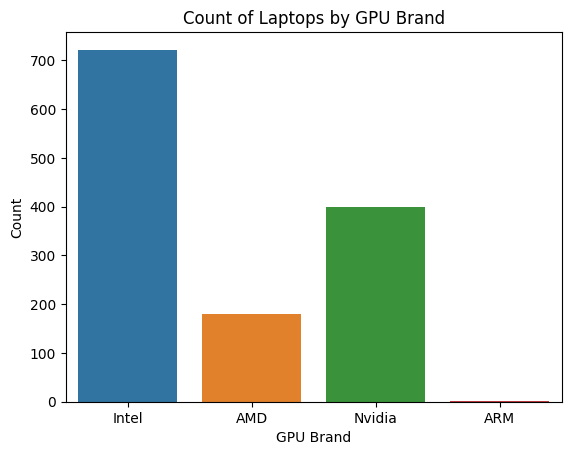

In [742]:
GpuBrand_Count=df["Gpu Brand"].value_counts()
print(GpuBrand_Count)
print("***************************************************************************")
sns.countplot(data=df,x=df["Gpu Brand"])
plt.title("Count of Laptops by GPU Brand")
plt.xlabel("GPU Brand")
plt.ylabel("Count")
plt.show()

### Filtering Out Rows with 'ARM' in the 'Gpu Brand' Column

In [743]:
df=df[df["Gpu Brand"] != "ARM"]

### Updated Count of Laptops by GPU Brand After Removing 'ARM'

***************************************************************************


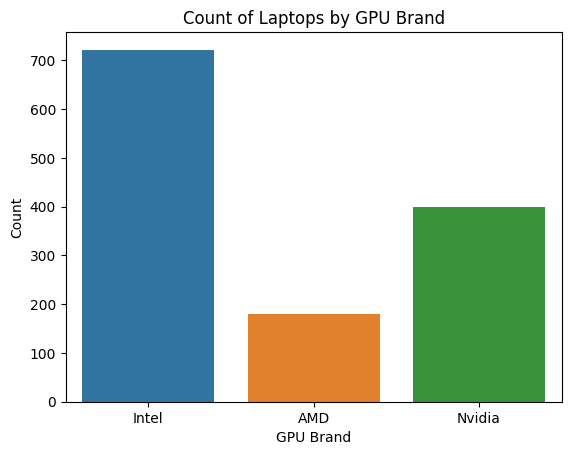

In [744]:
df["Gpu Brand"].value_counts()
print("***************************************************************************")
sns.countplot(data=df,x=df["Gpu Brand"])
plt.title("Count of Laptops by GPU Brand")
plt.xlabel("GPU Brand")
plt.ylabel("Count")
plt.show()

### Average Price of Laptops by GPU Brand

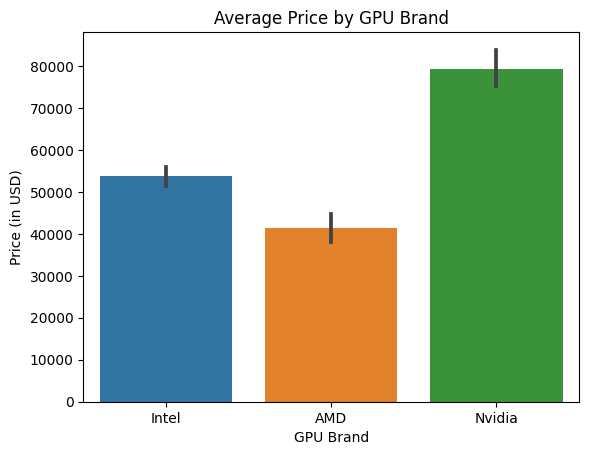

In [745]:
sns.barplot(data=df,x=df["Gpu Brand"],y=df["Price"])
plt.title("Average Price by GPU Brand")
plt.xlabel("GPU Brand")
plt.ylabel("Price (in USD)")

plt.show()

* Top GPU Brands by Average Price:

    * GPU brands with higher average prices are likely associated with premium laptops (e.g., "NVIDIA" or "AMD" may dominate high-performance laptops, especially for gaming or professional workloads).

* Mid-range and Budget Options:

    * Brands like "Intel" may represent integrated graphics solutions, which are commonly found in budget and mid-range laptops. These laptops generally have lower prices.

* Market Segmentation:

    * The plot may reveal market segmentation, where certain brands cater to specific price tiers, e.g., "Intel" for budget laptops and "NVIDIA" for high-end gaming or professional models.

### Dropping the 'Gpu' Column from the DataFrame

In [746]:
df.drop(columns="Gpu",inplace=True)

In [747]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand
0,Apple,Ultrabook,8.0,macOS,0.862890,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8.0,macOS,0.850151,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8.0,No OS,1.050822,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16.0,macOS,1.040277,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8.0,macOS,0.862890,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0,Intel


# EDA For OpSys Column

### Count of Laptops by Operating System

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64
*************************************************************************


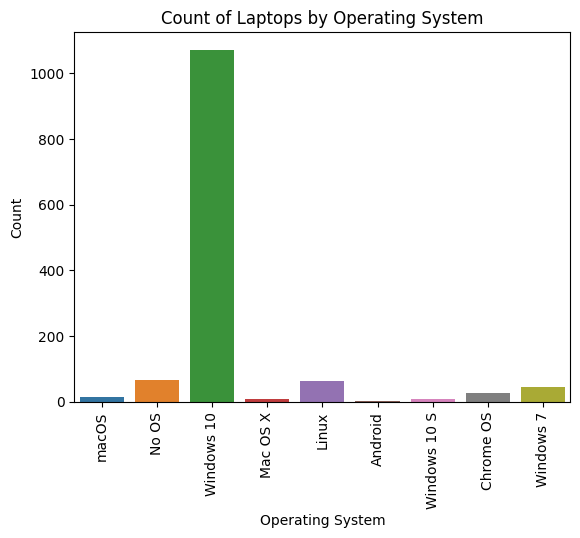

In [748]:
OpSys_Count=df["OpSys"].value_counts()
print(OpSys_Count)
print("*************************************************************************")
sns.countplot(data=df,x=df["OpSys"])
plt.title("Count of Laptops by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Count")

plt.xticks(rotation=90)
plt.show()

### Average Laptop Price by Operating System

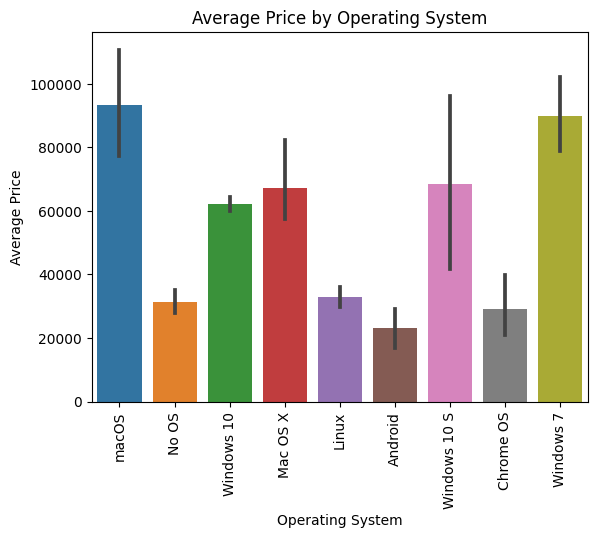

In [749]:
sns.barplot(data=df,x=df["OpSys"],y=df["Price"])
plt.title("Average Price by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

### Categorizing Operating Systems into 'Windows', 'Mac', and 'Others/No OS/Linux

In [750]:
def cat_os(inp):
    if inp =='Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return "Windows"
    elif inp == 'macOS' or inp == 'Mac OS X':
        return "Mac"
    else:
        return 'Others/No OS/Linux'
        

# EDA For OS Column

### Creating a New 'OS' Column by Categorizing Operating Systems

In [751]:
df["OS"]=df["OpSys"].apply(cat_os)

### Dropping the 'OpSys' Column from the DataFrame"

In [752]:
df.drop(columns="OpSys",inplace=True)

In [753]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand,OS
0,Apple,Ultrabook,8.0,0.862890,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8.0,0.850151,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8.0,1.050822,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16.0,1.040277,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8.0,0.862890,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Mac


### Count of Laptops by Categorized Operating System

OS
Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: count, dtype: int64
***************************************************************************


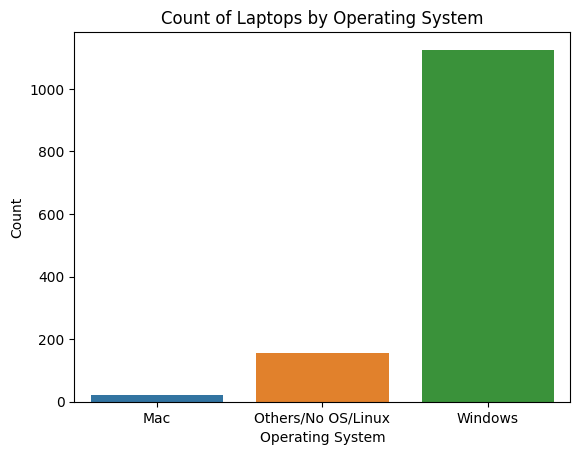

In [754]:
Os_count=df["OS"].value_counts()
print(Os_count)
print("***************************************************************************")
sns.countplot(data=df,x=df["OS"])
# Add title and labels
plt.title("Count of Laptops by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Count")
plt.show()

### Average Laptop Price by Operating System Category

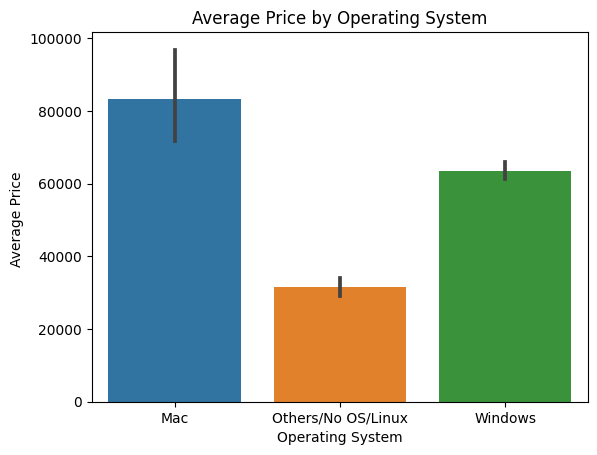

In [755]:
sns.barplot(data=df,x=df["OS"],y=df["Price"])
plt.title("Average Price by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Price ")
plt.show()

### Distribution of Laptop Weights

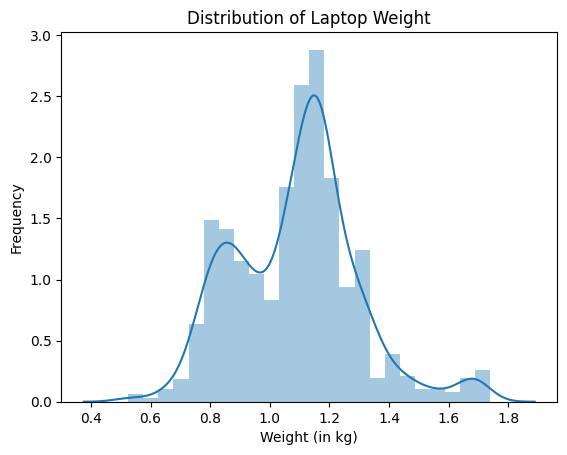

In [756]:
sns.distplot(df["Weight"])
plt.title("Distribution of Laptop Weight")
plt.xlabel("Weight (in kg)")
plt.ylabel("Frequency")

plt.show()

# EDA For Price Column

### Scatter Plot of Laptop Weight vs. Price

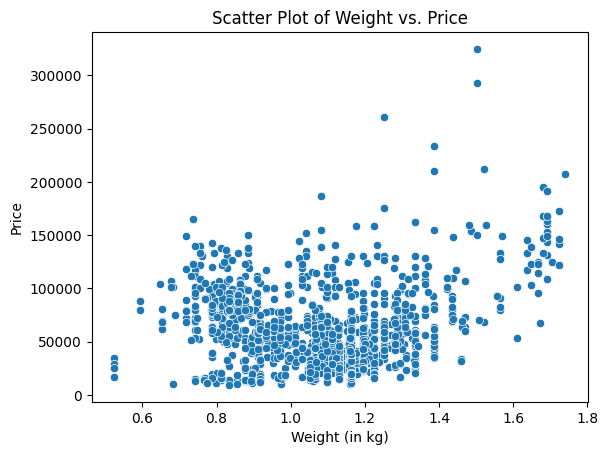

In [757]:
sns.scatterplot(x=df["Weight"],y=df["Price"])
plt.title("Scatter Plot of Weight vs. Price")
plt.xlabel("Weight (in kg)")
plt.ylabel("Price")
plt.show()

### Correlation Heatmap of Numeric Features with Price

<Axes: >

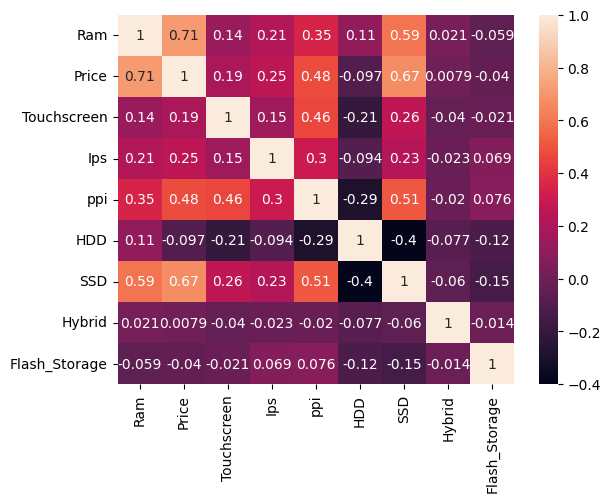

In [758]:
numeric_df = df.select_dtypes(include=['float64', 'int64',"int32"])
correlation_with_price = numeric_df.corr()['Price']
sns.heatmap(numeric_df.corr(),annot=True)


### Distribution of Log-Transformed Laptop Prices

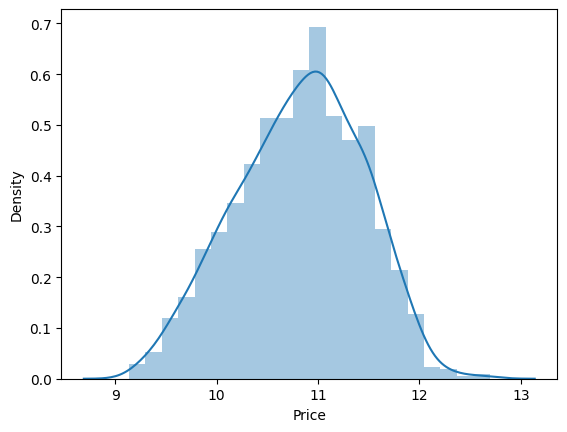

In [759]:
sns.distplot(np.log(df['Price']))
plt.show()

In [760]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand,OS
0,Apple,Ultrabook,8.0,0.862890,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8.0,0.850151,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8.0,1.050822,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16.0,1.040277,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8.0,0.862890,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Mac


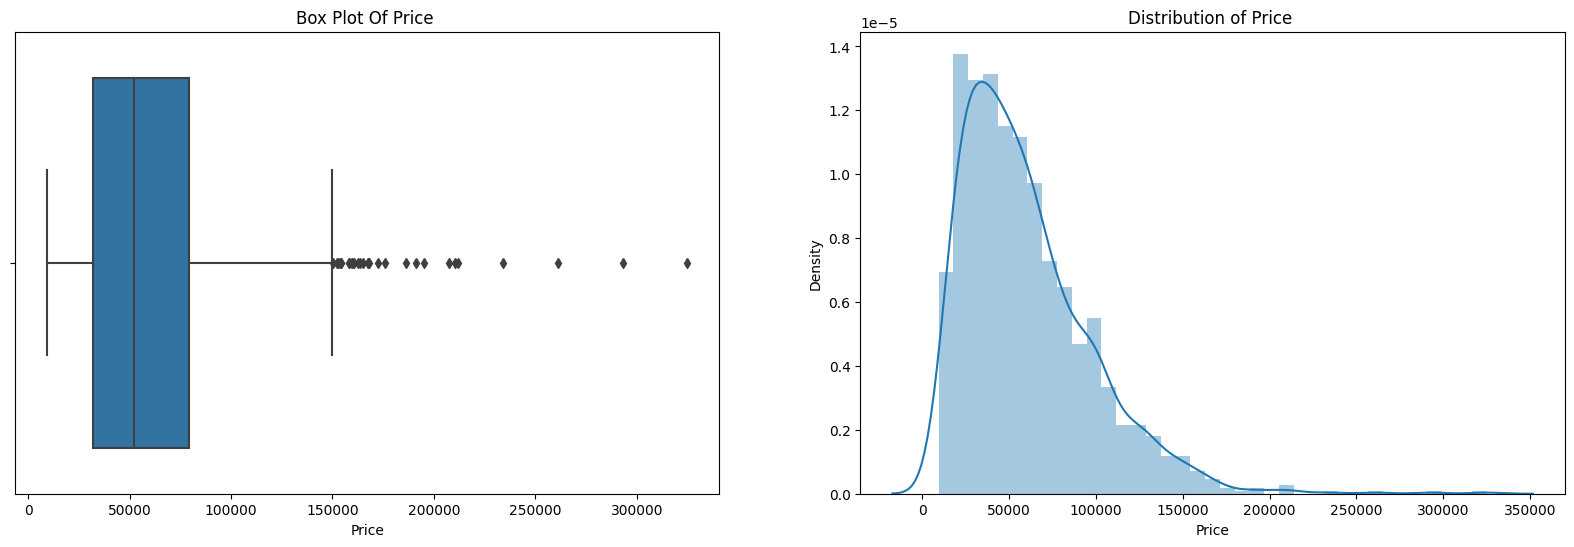

In [761]:

plt.figure(figsize=(20, 6))


plt.subplot(1,2,1)
plt.title("Box Plot Of Price ")
sns.boxplot(x="Price",data=df)


plt.subplot(1,2,2)
plt.title("Distribution of Price ")
sns.distplot(df["Price"])
plt.show()

In [762]:

# Define upper and lower bounds (5th and 95th percentiles)
lower_bound = np.percentile(df['Price'], 5)
upper_bound = np.percentile(df['Price'], 95)

# Cap the outliers
df['Price'] = np.where(df['Price'] > upper_bound, upper_bound, df['Price'])
df['Price'] = np.where(df['Price'] < lower_bound, lower_bound, df['Price'])

In [763]:
# Log transformation
df['Price'] = np.log1p(df['Price'])

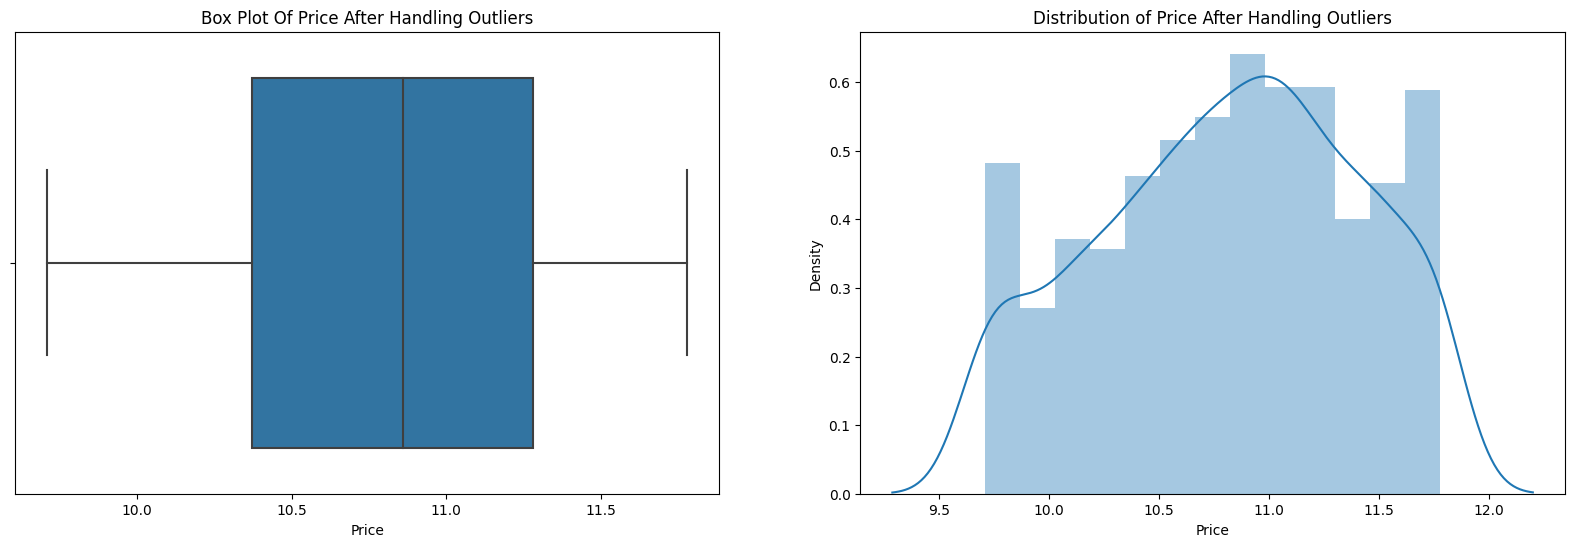

In [764]:

plt.figure(figsize=(20, 6))


plt.subplot(1,2,1)
plt.title("Box Plot Of Price After Handling Outliers")
sns.boxplot(x="Price",data=df)


plt.subplot(1,2,2)
plt.title("Distribution of Price After Handling Outliers")
sns.distplot(df["Price"])
plt.show()

# Building Model

### Preparing Data for Model: Features (X) and Target (y) with Log-Transformed Price

In [765]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [766]:
x

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand,OS
0,Apple,Ultrabook,8.0,0.862890,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8.0,0.850151,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8.0,1.050822,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16.0,1.040277,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8.0,0.862890,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4.0,1.029619,1,1,157.350512,Intel Core i7,Intel Core i7,0,128,0,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16.0,0.832909,1,1,276.053530,Intel Core i7,Intel Core i7,0,512,0,0,Intel,Windows
1300,Lenovo,Notebook,4.0,0.916291,0,0,111.935204,Intel Celeron Dual,Other Intel Processor,0,0,0,64,Intel,Windows
1301,HP,Notebook,6.0,1.160021,0,0,100.454670,Intel Core i7,Intel Core i7,1000,0,0,0,AMD,Windows


In [767]:
y

0       2.413748
1       2.377396
2       2.335049
3       2.466312
4       2.440006
          ...   
1298    2.345063
1299    2.423751
1300    2.273049
1301    2.362188
1302    2.291161
Name: Price, Length: 1302, dtype: float64

### Splitting Data into Training and Test Sets (15% Test Size)

In [768]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

### Displaying the Shape of Training and Test Data

In [769]:
print(f"The Shape Of x_train Is : {x_train.shape}")
print(f"The Shape Of x_test Is : {x_test.shape}")
print(f"The Shape Of y_train Is : {y_train.shape}")
print(f"The Shape Of y_test Is : {y_test.shape}")

The Shape Of x_train Is : (1106, 15)
The Shape Of x_test Is : (196, 15)
The Shape Of y_train Is : (1106,)
The Shape Of y_test Is : (196,)


### Preprocessing Laptop Dataset: Categorical Encoding and Numerical Features

In [770]:
categorical_cols = ['Company', 'TypeName', 'Cpu Name',"Cpu Brand", 'Gpu Brand','OS']
numerical_cols = [ 'Ram', 'Touchscreen', 'Ips','ppi', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage']

### Scikit-Learn ColumnTransformer: Handling Categorical and Numerical Features

In [771]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)  # Pass through numerical columns
    ]
)

In [772]:
result1=[]
result2=[]
result3=[]
result4=[]
result5=[]

### Training and Evaluating Regression Models with Scikit-Learn Pipeline

In [773]:
from sklearn.pipeline import Pipeline
def call(model):


      pipe = Pipeline([
       ('preprocessor', preprocessor),
       ('Model', model)
    ])
    
      pipe.fit(x_train, y_train)
      y_pred = pipe.predict(x_test)


      mse = mean_squared_error(y_test, y_pred)
      rmse = np.sqrt(mse)
      r2 = r2_score(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)
      mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
      
      result1.append(mse)
      result2.append(rmse)
      result3.append(r2)
      result4.append(mae)
      result5.append(mape)
      print(model)
      print("***************************************************")
      # print("Accuracy:", accuracy)
      print("Mean Squared Error(MSE):", mse)
      print("Root Mean Squared Error (RMSE):", rmse)
      print("R-squared (R2): ",r2)
      print("Mean Absolute Error (MAE):", mae)
      print("Mean Absolute Percentage Error (MAPE):",mape,"%")
      print("*******************************************************************************************")
      

### Defining Regression Models

In [774]:
Model1= Lasso(alpha=0.001)
Model2=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
Model3=ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
Model4=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
Model5=GradientBoostingRegressor(n_estimators=500)
Model6= XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
Model7=VotingRegressor([('rf',  RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
                        ('gbdt', GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
                        ('xgb',XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)),
                        ('et',ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True ))],
                       weights=[5,1,1,1])


### (Lasso) Running the Lasso Model: Training, Prediction, and Evaluation

In [775]:
call(Model1)

Lasso(alpha=0.001)
***************************************************
Mean Squared Error(MSE): 0.0005666365444215566
Root Mean Squared Error (RMSE): 0.023804128726369226
R-squared (R2):  0.8105141783505316
Mean Absolute Error (MAE): 0.01893923419582083
Mean Absolute Percentage Error (MAPE): 0.7956442372552185 %
*******************************************************************************************


### (Random Forest) Running the Random Forest Model: Training, Prediction, and Evaluation

In [776]:
call(Model2)

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)
***************************************************
Mean Squared Error(MSE): 0.00033361281730354207
Root Mean Squared Error (RMSE): 0.018265070963550678
R-squared (R2):  0.8884383659651042
Mean Absolute Error (MAE): 0.014410821641217772
Mean Absolute Percentage Error (MAPE): 0.6051578750355163 %
*******************************************************************************************


### (Extra Trees) Running the Extra Trees Model: Training, Prediction, and Evaluation

In [777]:
call(Model3)

ExtraTreesRegressor(bootstrap=True, max_depth=15, max_features=0.75,
                    max_samples=0.5, random_state=3)
***************************************************
Mean Squared Error(MSE): 0.00033447494255311224
Root Mean Squared Error (RMSE): 0.018288656116650898
R-squared (R2):  0.8881500673848453
Mean Absolute Error (MAE): 0.014582777493889037
Mean Absolute Percentage Error (MAPE): 0.6125743199567384 %
*******************************************************************************************


### (AdaBoost Model) Running the AdaBoost Model: Training, Prediction, and Evaluation

In [778]:
call(Model4)

AdaBoostRegressor(n_estimators=15)
***************************************************
Mean Squared Error(MSE): 0.0005491725788577504
Root Mean Squared Error (RMSE): 0.023434431481428143
R-squared (R2):  0.8163542073721224
Mean Absolute Error (MAE): 0.019579589196525308
Mean Absolute Percentage Error (MAPE): 0.8254175757552212 %
*******************************************************************************************


### (Gradient Boosting) Running the Gradient Boosting Model: Training, Prediction, and Evaluation

In [779]:
call(Model5)

GradientBoostingRegressor(n_estimators=500)
***************************************************
Mean Squared Error(MSE): 0.00030194791474359207
Root Mean Squared Error (RMSE): 0.01737664854750743
R-squared (R2):  0.8990272525063836
Mean Absolute Error (MAE): 0.013600026094033895
Mean Absolute Percentage Error (MAPE): 0.5708529292169107 %
*******************************************************************************************


### (XGBoost) Running the XGBoost Model: Training, Prediction, and Evaluation

In [780]:
call(Model6)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=45, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
***************************************************
Mean Squared Error(MSE): 0.00031044893137630253
Root Mean Squared Error (RMSE): 0.017619561043803064
R-squared (R2):  0.8961844741198443
Mean Absolute Error (MAE): 0.01335901603822138
Mean Absolute Percentag

### (Voting Regressor) Running the Voting Regressor: Training, Prediction, and Evaluation"

In [781]:
call(Model7)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=15,
                                                   max_features=0.75,
                                                   max_samples=0.5,
                                                   n_estimators=350,
                                                   random_state=3)),
                            ('gbdt',
                             GradientBoostingRegressor(max_features=0.5)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_ro...
                                          max_cat_to_onehot=None,
       

In [782]:
models=["Lasso","RandomForestRegressor","ExtraTreesRegressor","AdaBoostRegressor","GradientBoostingRegressor","XGBRegressor","VotingRegressor"]

# Compare Accuracies

### Comparison of Regression Models: MSE, RMSE, R2, MAE, and MAPE

In [783]:
FinalResult=pd.DataFrame({"Algorithms":models,"Mean Squared Error(MSE)":result1,"Root Mean Squared Error (RMSE)":result2,"R-squared (R2)":result3,"Mean Absolute Error (MAE)":result4,"Mean Absolute Percentage Error (MAPE)":result5})
FinalResult

,Algorithms,Mean Squared Error(MSE),Root Mean Squared Error (RMSE),R-squared (R2),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE)
0,Lasso,0.000567,0.023804,0.810514,0.018939,0.795644
1,RandomForestRegressor,0.000334,0.018265,0.888438,0.014411,0.605158
2,ExtraTreesRegressor,0.000334,0.018289,0.888150,0.014583,0.612574
3,AdaBoostRegressor,0.000549,0.023434,0.816354,0.019580,0.825418
4,GradientBoostingRegressor,0.000302,0.017377,0.899027,0.013600,0.570853
5,XGBRegressor,0.000310,0.017620,0.896184,0.013359,0.560937
6,VotingRegressor,0.000313,0.017692,0.895325,0.014028,0.589204
